In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# sorting the data
baseline = np.genfromtxt('bench test sd card/baseline.csv', delimiter=',', names=True) #unfortunately super zoomed out
whiteNoise = np.genfromtxt("bench test sd card/whitenoise.csv", delimiter=',', names=True) #not the same as pic i think

# voltage for all this white noise is Vpp
white100mV = np.genfromtxt("bench test sd card/white100mV.csv", delimiter=',', names=True)
white500mV = np.genfromtxt("bench test sd card/white500mV.csv", delimiter=',', names=True)
white1kmV = np.genfromtxt("bench test sd card/white1kmV.csv", delimiter=',', names=True)
white1k5mV = np.genfromtxt("bench test sd card/white1k5mV.csv", delimiter=',', names=True)
white2kmV = np.genfromtxt("bench test sd card/white2kmV.csv", delimiter=',', names=True)
white2k5mV = np.genfromtxt("bench test sd card/white2k5mV.csv", delimiter=',', names=True)
white3kmV = np.genfromtxt("bench test sd card/white3kmV.csv", delimiter=',', names=True) #red flashing on CANDAP, AMS was not happy at one point
white4kmV = np.genfromtxt("bench test sd card/white4kmV.csv", delimiter=',', names=True) #lots of red, AMS shutdown (lost packet from BMS ok)

# arb inverter emulating noise
arb8kHz3Vpp = np.genfromtxt("bench test sd card/arb8kHz3Vpp.csv", delimiter=',', names=True) # just noise sample
arb2Vpp = np.genfromtxt("bench test sd card/arb2Vpp.csv", delimiter=',', names=True)
arb3Vpp = np.genfromtxt("bench test sd card/arb3Vpp.csv", delimiter=',', names=True)
arb4Vpp = np.genfromtxt("bench test sd card/arb4Vpp.csv", delimiter=',', names=True)

data = whiteNoise

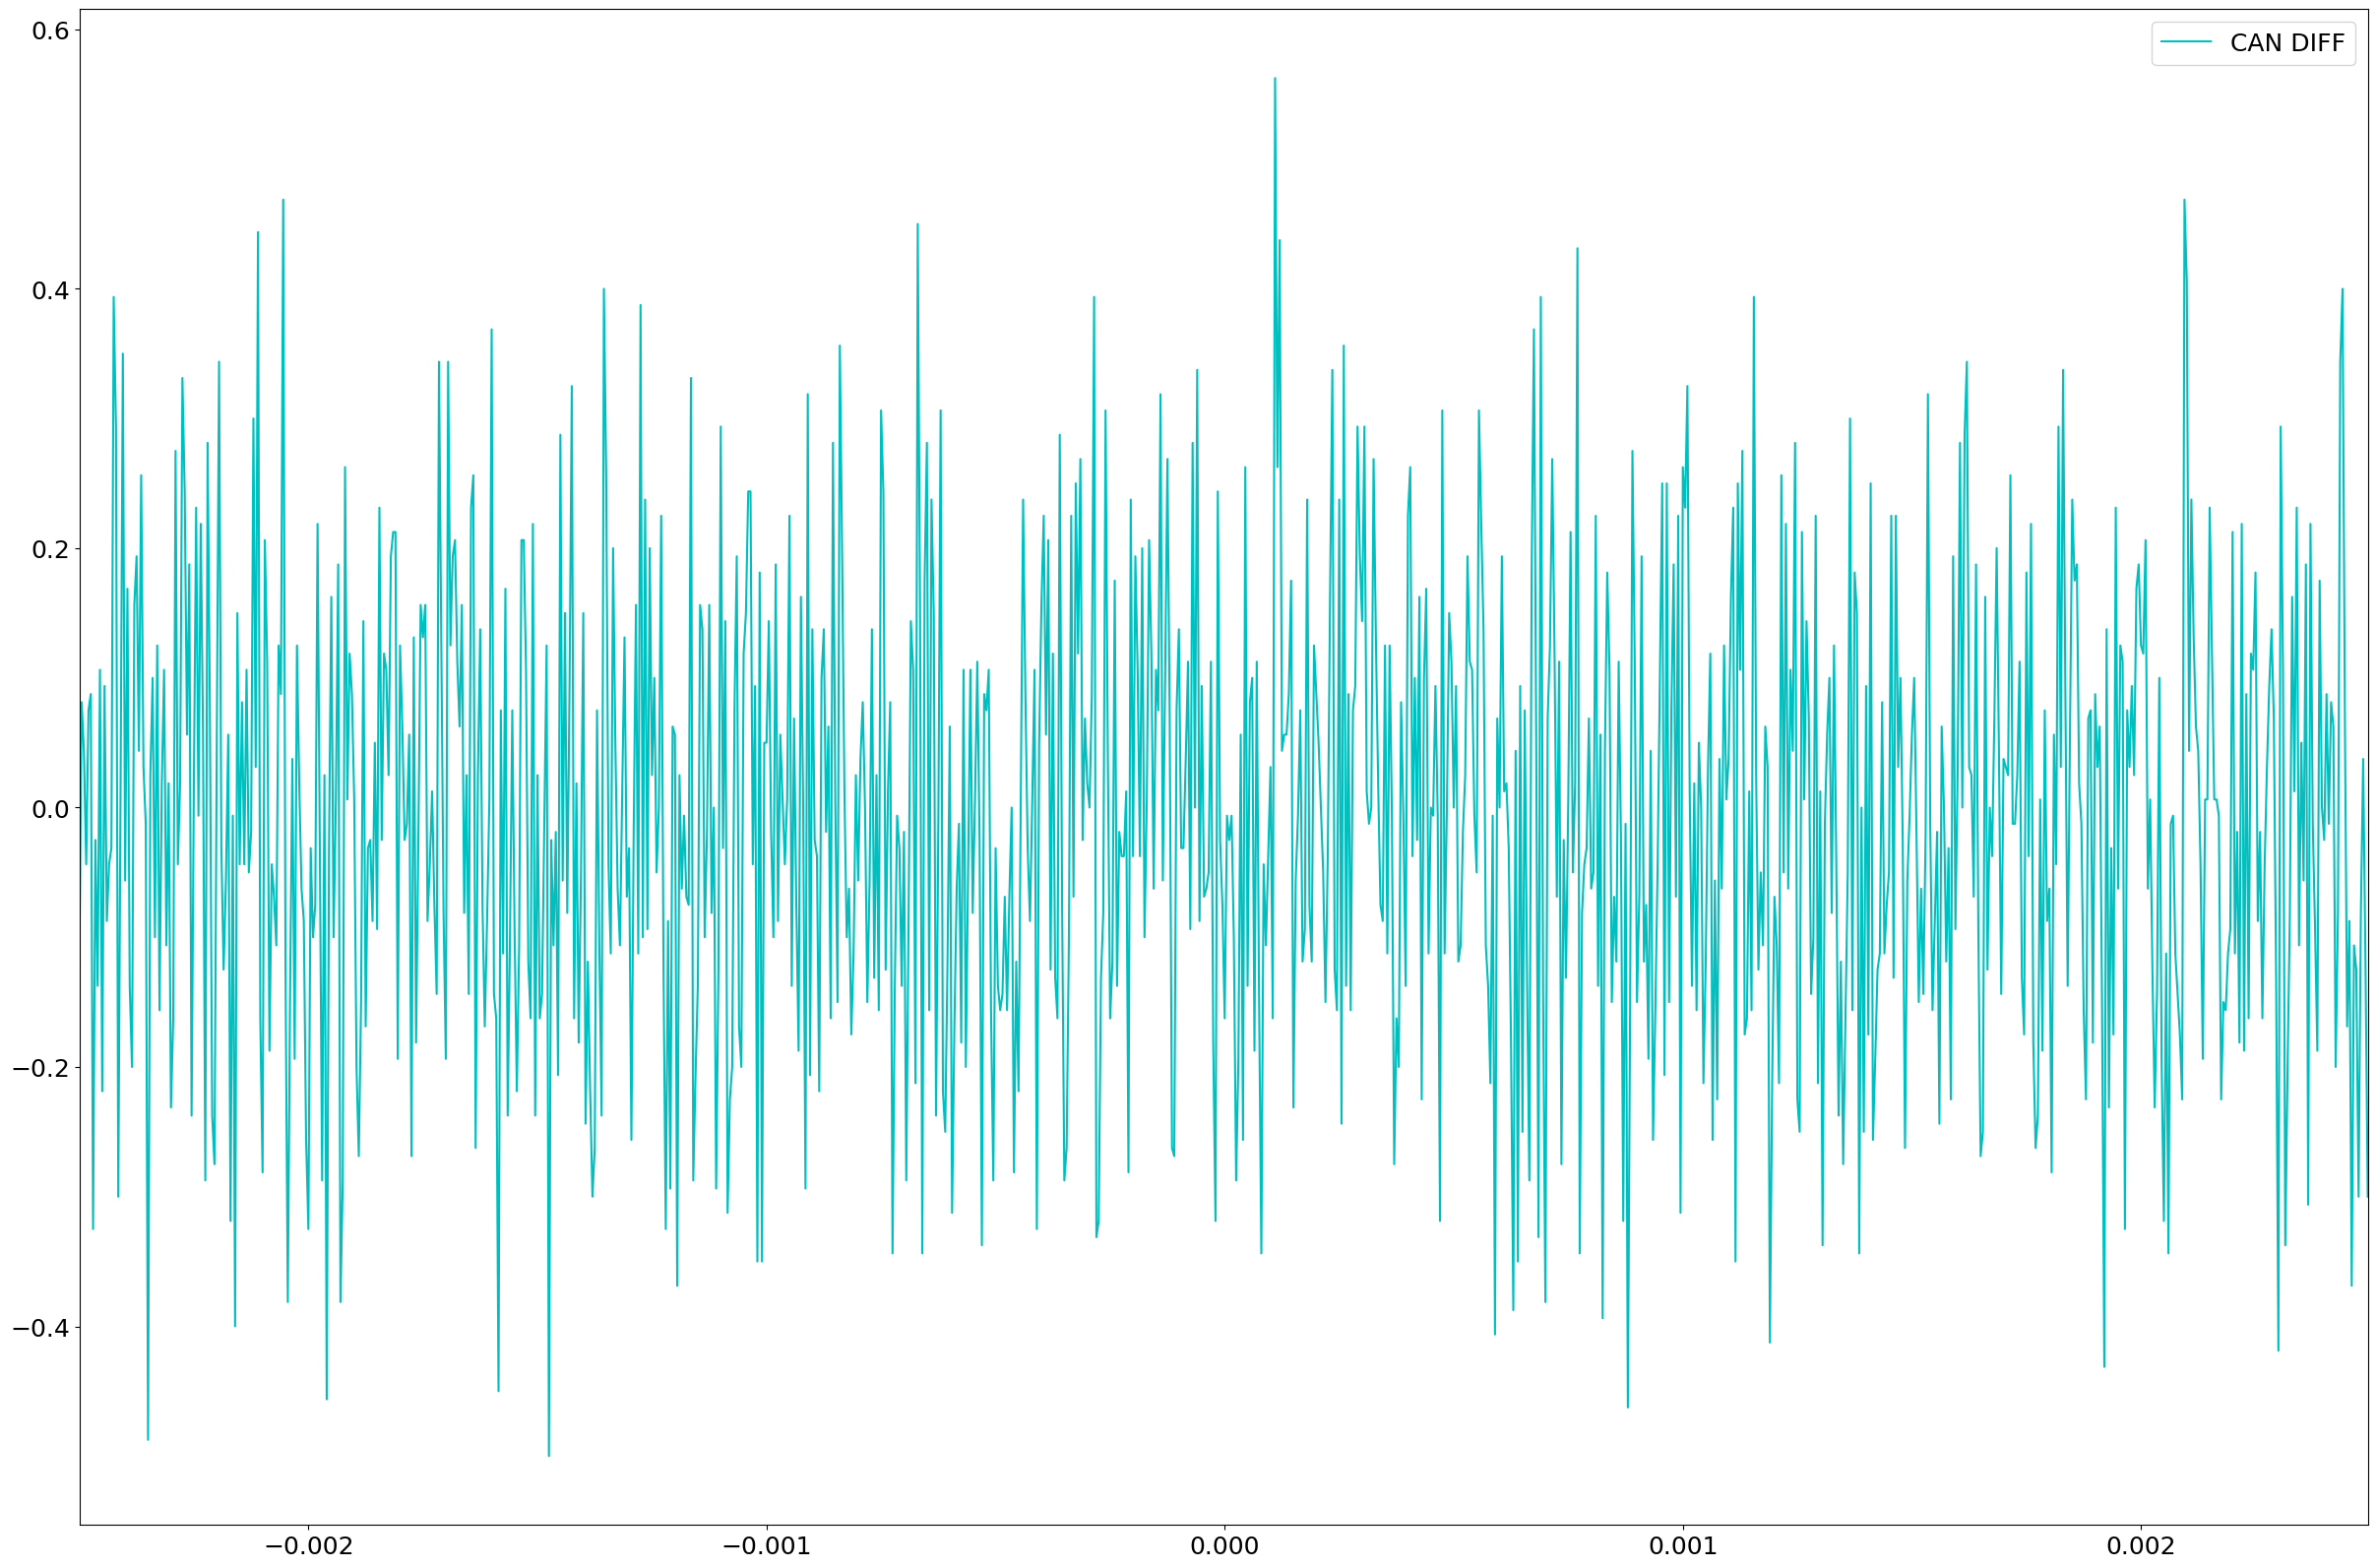

In [4]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 18})
# plt.style.use('dark_background') if want darkmode

t = data['second']
# canh = data['CANH']
# canl = data['CANL']
diff = data['Volt']

plt.plot(t,diff,color='c',linewidth=1.5,label='CAN DIFF')
plt.xlim(t[0],t[-1])
plt.legend()

/home/chris/code/pyvenvs/noiseFFT/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/chris/code/pyvenvs/noiseFFT/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

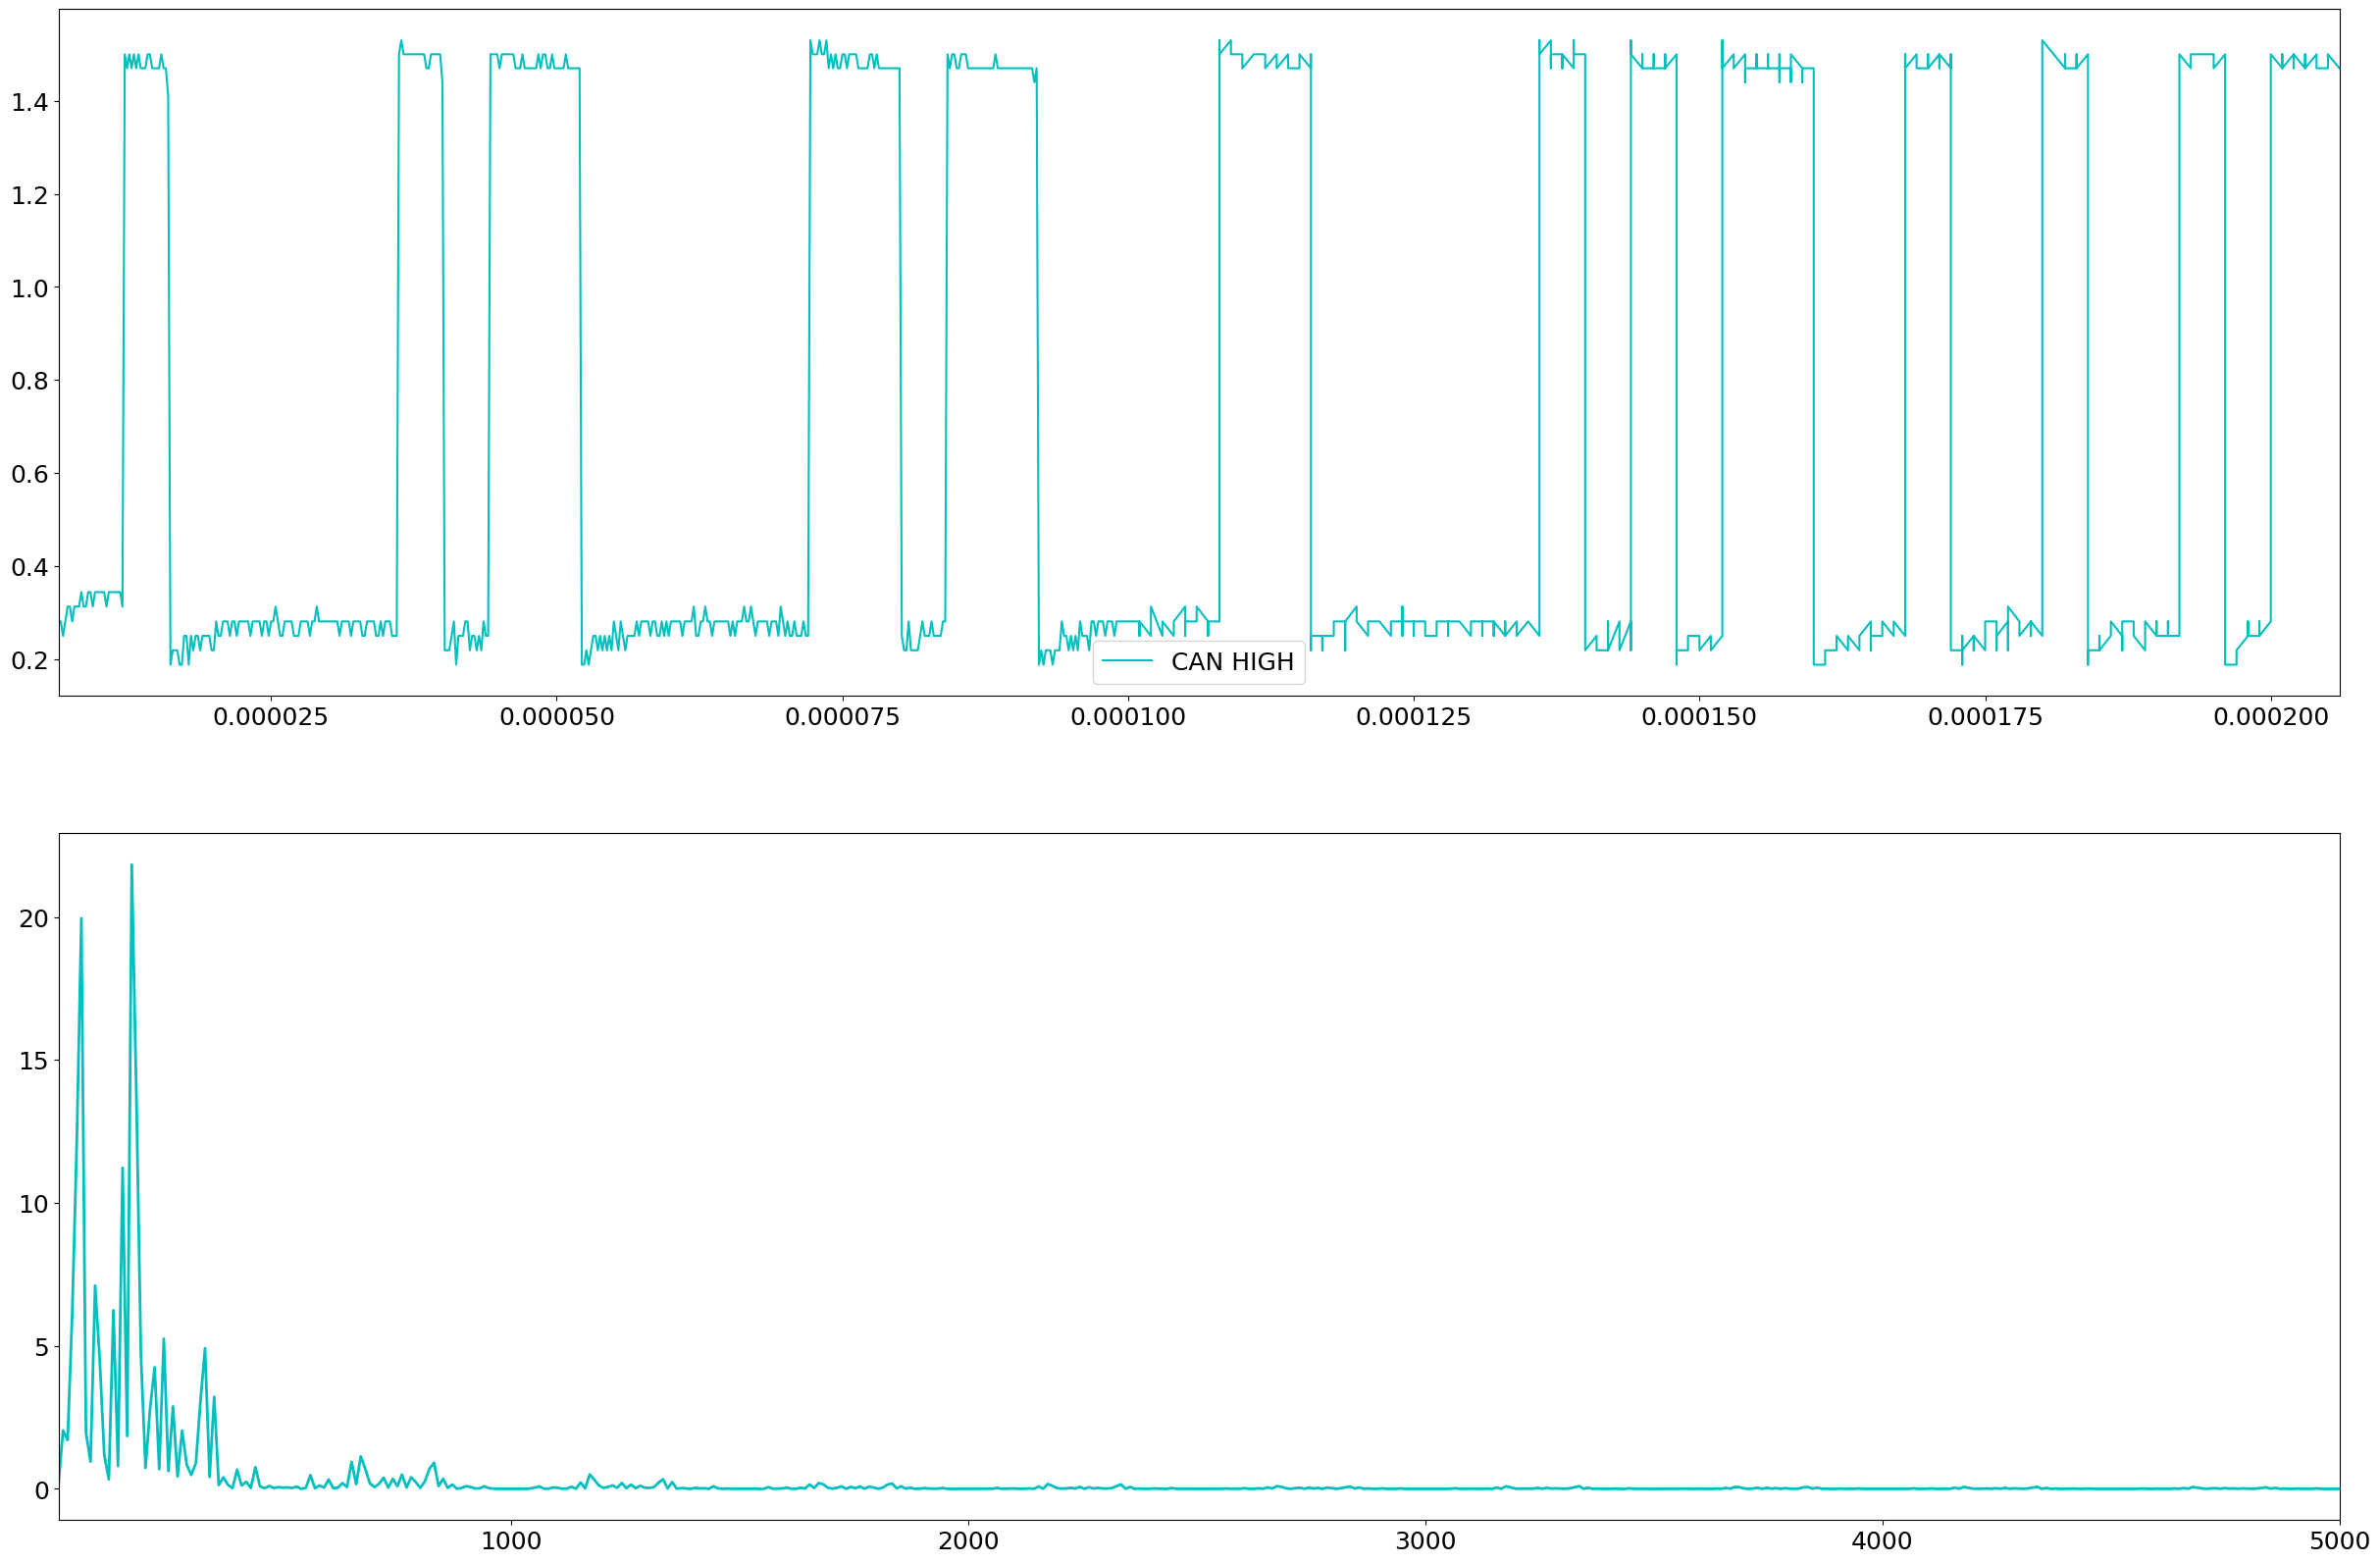

In [61]:
# Doing FFT
n = len(t)
# Compute the FFT
fhat = np.fft.fft(canh,n)
# Power spectrum (per freq)
PSD = fhat * np.conj(fhat) / n
# Create x axis of freq
freq = (1/ * np.arange(n)
# Only plot the first half of data points?
L = np.arange(1,np.floor(n/2),dtype='int') 

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,canh,color='c',linewidth=1.5,label='CAN HIGH')
# plt.plot(t,f_clean,color='r',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend

plt.show

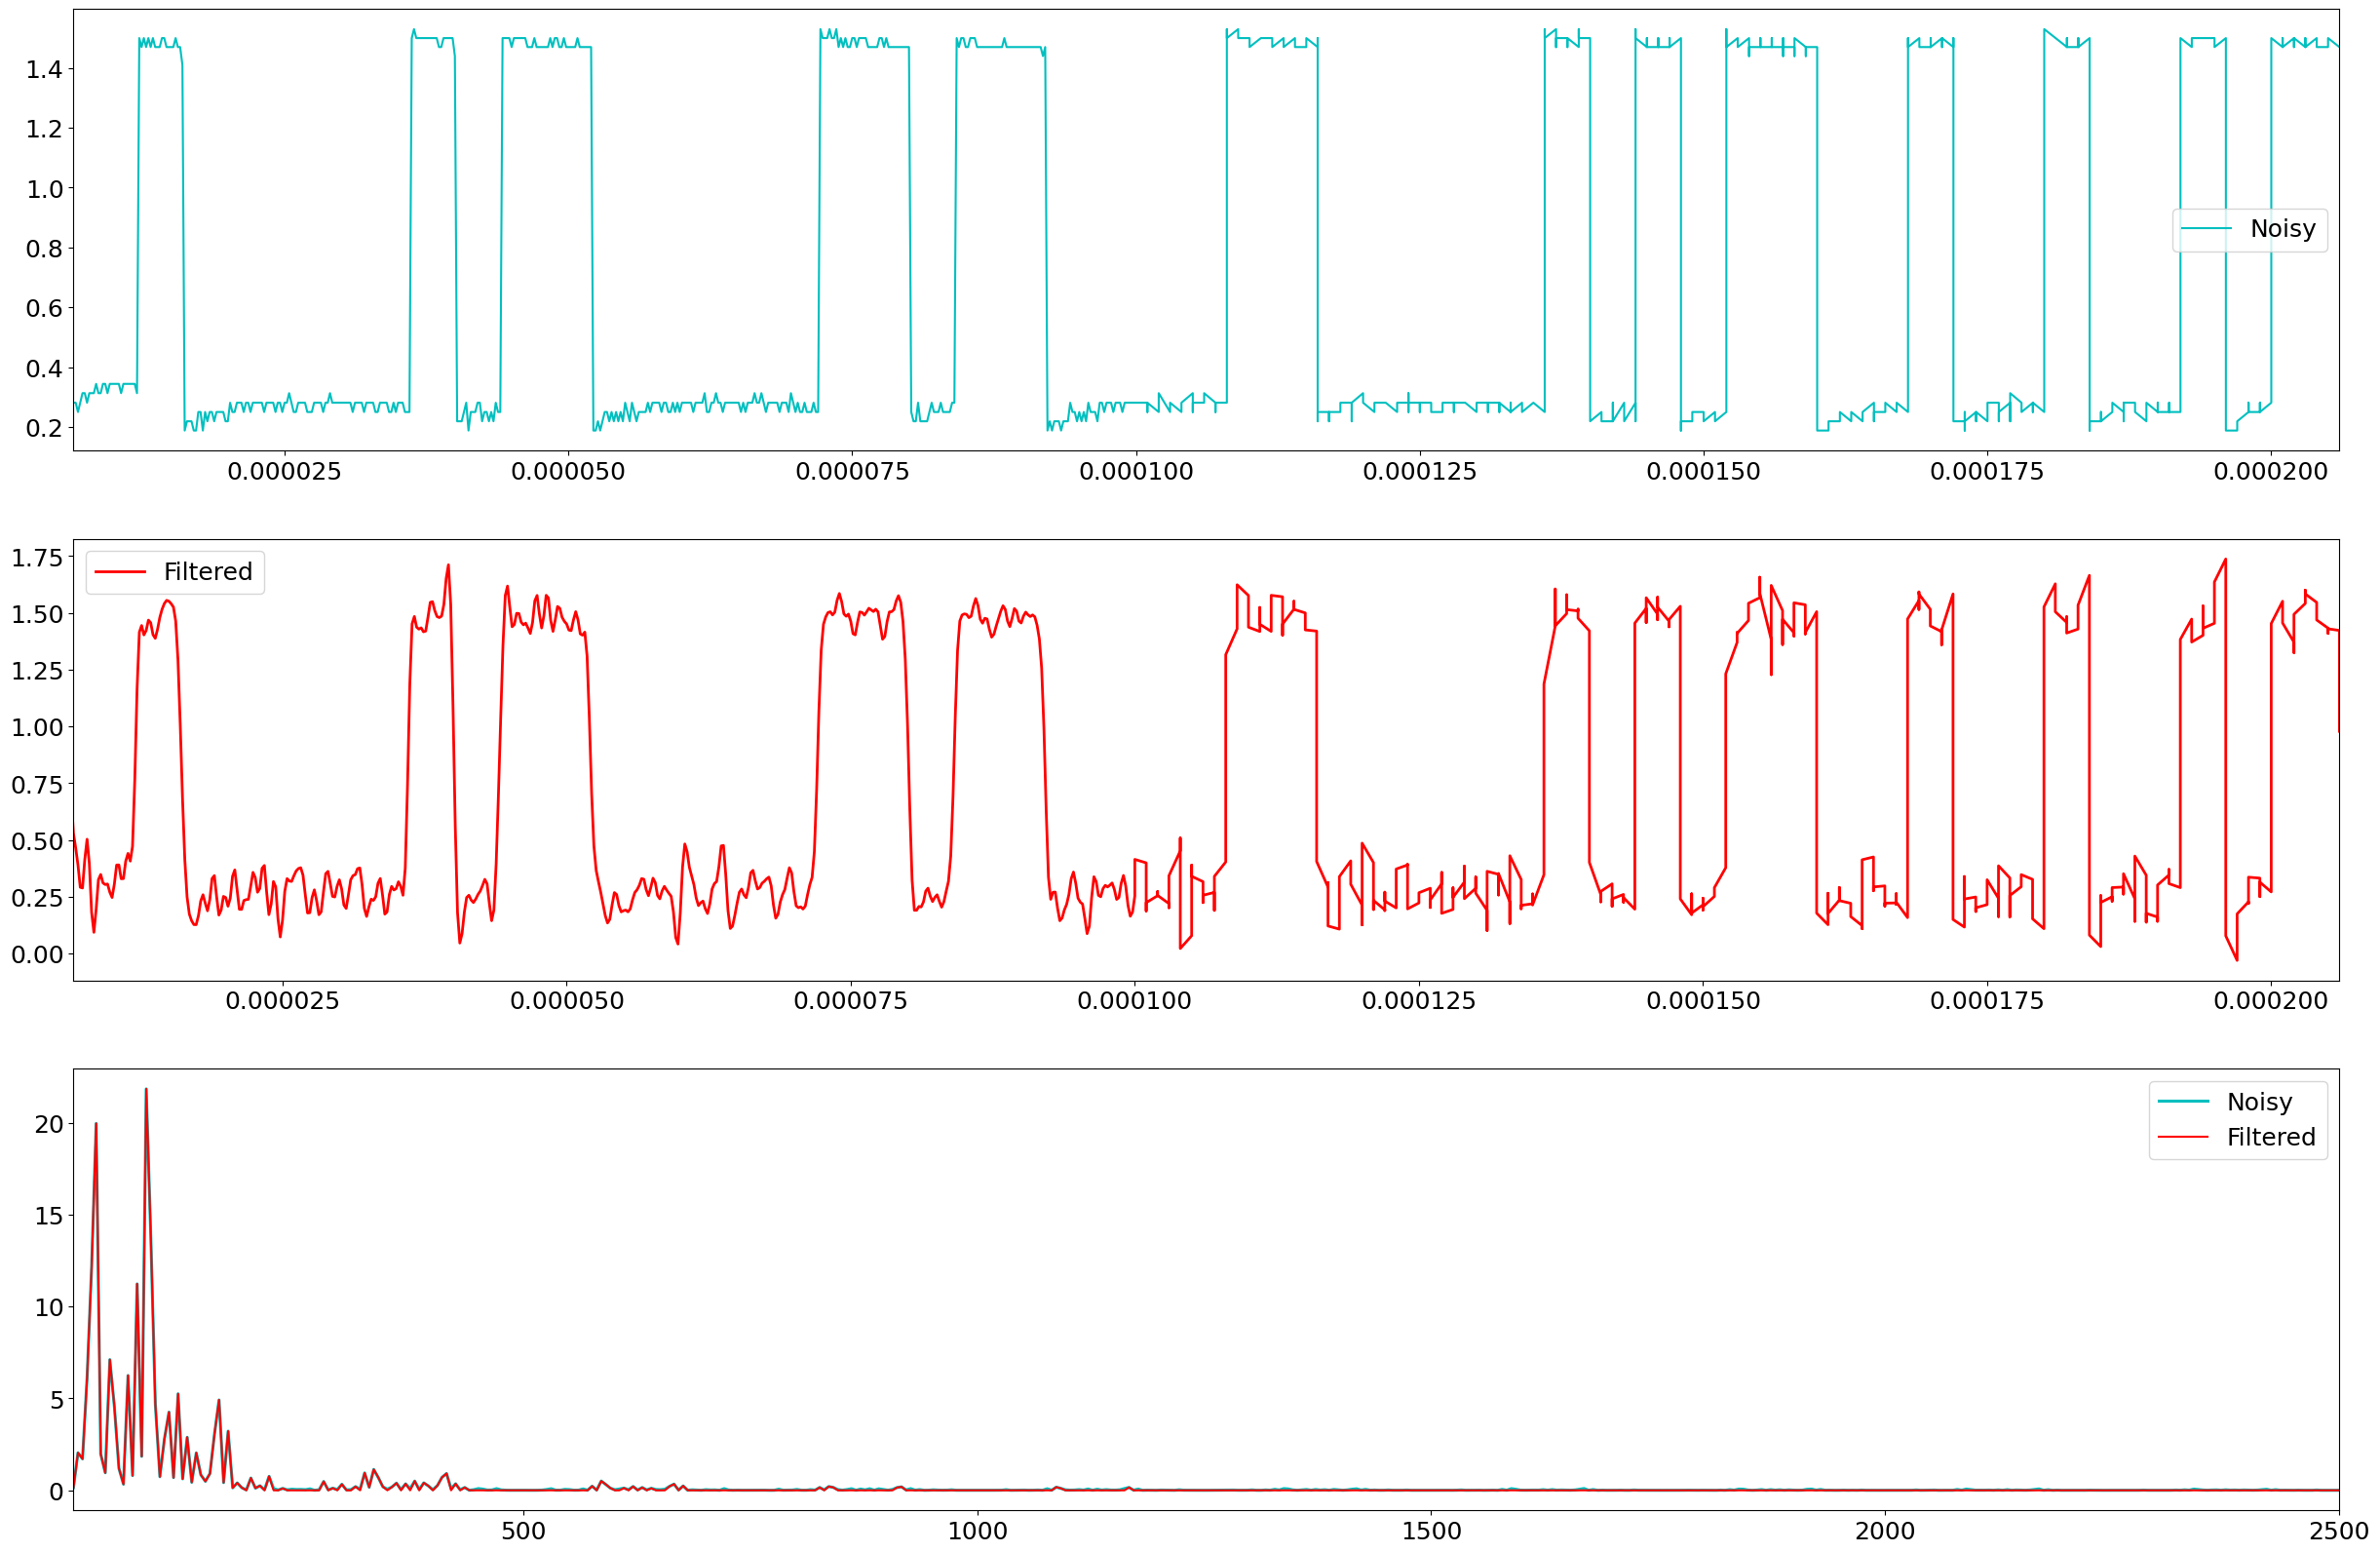

In [60]:
## Use the PSD to filter out the noise
indices = PSD > 0.1 # Find large power freqs
PSDclean = PSD * indices # Zero out all others
fhat = indices * fhat # Zero out small Fourier coeffs in Y
ffilt = np.fft.ifft(fhat) # inverse FFT for filtered time signal

## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,canh,color='c',linewidth=1.5,label='Noisy')
# plt.plot(t,f_clean,color='r',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='r',linewidth=2,label='Filtered')
plt.xlim(t[1],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',linewidth=2.2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='r',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()